<a href="https://colab.research.google.com/github/guangyoung/test2/blob/main/test_engine_QG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

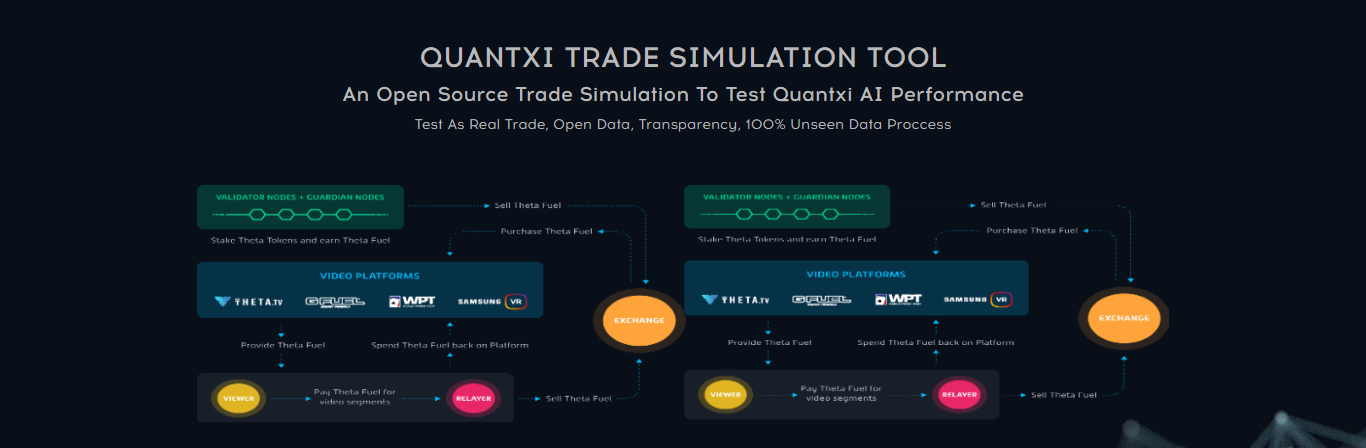

# **LIBRARY**

In [ ]:
!pip install yfinance

In [ ]:
!pip install pandas_datareader

In [ ]:
import getpass
import pandas as pd
import yfinance as yf
# import panel as pn
import datetime
import requests
import datetime as dt
import numpy as np
# import param
from pandas_datareader import data as pdr
# yf.pdr_override()
# import progressbar
import sys
import ipywidgets as widgets
import time
# from progressbar import ProgressBar, Percentage, GranularBar, Timer, ETA, Counter
# pn.extension()
import json
import random

# **QZ** **API** **KEY**

In [ ]:
api_key = widgets.Password(value='',placeholder='Enter QZ API Key',description='QZ API Key:',disabled=False)
api_key

Password(description='QZ API Key:', placeholder='Enter QZ API Key')

In [ ]:
response = requests.delete("http://api.quantgenius.ai/reset", headers = {"X-API-KEY":api_key.value})
if response.json()['status'] == 'Success':
  print(f"Selamat Datang {response.json()}")
else :
  print("Maaf API Key yang anda masukkan salah, coba di ulang lagi !!!")

Selamat Datang {'status': 'Success', 'message': 'Your data has been successfully reset'}


In [ ]:
data_input = {
                "previousSignalHashcode": "0000000000000000000000000000000000000000000000000000000000000000",
                "equityBalance": 1000000.00,
                "portfolio":{
                    "assetPrice": [
                        123.3234556,
                        123.3234556,
                        123.3234556,
                        123.3234556,
                        123.3234556,
                        123.3234556,
                        123.3234556,
                        123.3234556,
                        123.3234556,
                        123.3234556,
                        123.3234556,
                        123.3234556,
                        123.3234556,
                        123.3234556,
                        123.3234556,
                        123.3234556,
                        123.3234556,
                        123.3234556,
                        123.3234556,
                        123.3234556,
                        123.3234556,
                        123.3234556,
                        123.3234556,
                        123.3234556,
                        123.3234556,
                        123.3234556,
                        123.3234556,
                        123.3234556,
                        123.3234556,
                        123.3234556
                    ],
                    "positionSize": [
                        2345,
                        2345,
                        2345,
                        2345,
                        2345,
                        2345,
                        2345,
                        2345,
                        2345,
                        2345,
                        2345,
                        2345,
                        2345,
                        2345,
                        2345,
                        2345,
                        2345,
                        2345,
                        2345,
                        2345,
                        2345,
                        2345,
                        2345,
                        2345,
                        2345,
                        2345,
                        2345,
                        2345,
                        2345,
                        2345
                    ]
                }
            };

In [ ]:
response = requests.post("http://api.quantgenius.ai/add", headers = {"X-API-KEY":api_key.value, "Content-Type": 'application/json'}, data = json.dumps(data_input))
# if response.json()['status'] == 'Success':
print(response.json())
# else :
#   print("Maaf API Key yang anda masukkan salah, coba di ulang lagi !!!")

{'status': 'Unauthorized access', 'message': 'Please try again later or check your previous signal hashcode'}


# **TEST SETTING**

In [ ]:
initial_equity = widgets.BoundedFloatText(value=1000000.0,min=1000000.0,max=1000000000.0,step=100000,description='Initial Equity :')
spread = widgets.BoundedFloatText(value=0.001,min=0.0,max=0.01,step=0.001,description='Spread :')
commision = widgets.BoundedFloatText(value=0.001,min=0.0,max=0.01,step=0.001,description='Commision :')
interest_rate = widgets.BoundedFloatText(value=0.03,min=0.0,max=0.1,step=0.001,description='Interest Rate :')
risk_free_rate = widgets.BoundedFloatText(value=0.01,min=0.0,max=0.1,step=0.001,description='Risk Free Rate :')

regT_margin_rate = 0.5
maintenance_margin_rate = 0.25
stock_price = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
stock_position_size = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
stock_market_value = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
daily_Interest = 0
cash_balance = initial_equity.value
market_value = 0
equity_with_loanValue = initial_equity.value
maintenance_margin_req = 0
excess_liquidity = 0
regT_margin_req = 0
excess_equity = 0
buying_power = 0
quantxi_equity = 0
buyhold_equity = 0
previous_quantxi_equity = initial_equity.value
previous_buyhold_equity = initial_equity.value
quantxi_total_return =0
buyhold_total_return =0
quantxi_cagr =0
buyhold_cagr =0
quantxi_mar =0
buyhold_mar =0
quantxi_sharpe =0
buyhold_sharpe =0
quantxi_sortino =0
buyhold_sortino =0
quantxi_equity_peak = 0
quantxi_maxDrawDown = 0
quantxi_maxDrawDown_adj = 0
buyhold_equity_peak = 0
buyhold_maxDrawDown = 0
quantxi_equity_array = []
buyhold_equity_array = []
excessLiquidity_array = []
quantxi_daily_return_array = []
buyhold_daily_return_array = []
quantxi_daily_return_downside_array = []
buyhold_daily_return_downside_array = []
previous_signal_hashcode = "0000000000000000000000000000000000000000000000000000000000000000"
data_idx_process = 0
accrued_interest = 0

widgets.HBox([widgets.VBox([initial_equity, spread, commision, interest_rate, risk_free_rate])])

# **TEST** **DATA**

In [ ]:
#add data stock
portfolio = {"ticker":[],"data":[]}
ticker_list = list(map(str, input("Enter a multiple ticker, space separated (see ticker list at http://www.kompas.com) :").split()))
while len(ticker_list) < 30:
  print("maaf ticker anda tidak sampai 30, coba diulang")
  ticker_list = list(map(str, input("Enter a multiple ticker, space separated (see ticker list at http://www.kompas.com) :").split()))

while len(portfolio["ticker"]) < 30:
  r = random.randrange(0, len(ticker_list)-1)
  if ticker_list[r] not in portfolio["ticker"]:
    ticker_data = yf.Ticker(ticker_list[r]).history(period="max")
    ticker_data.index = pd.to_datetime(ticker_data.index).date
    if len(ticker_data) > 1000:
      portfolio["ticker"].append(ticker_list[r])
      portfolio["data"].append(ticker_data)
    else:
      print("maaf data ticker ",ticker_list[r]," tidak cukup data, minimal data 1000 baris")
print("Your Portfolio :",portfolio["ticker"])

Enter a multiple ticker, space separated (see ticker list at http://www.kompas.com) :083650.KQ 33J.BE CMU GQN2.SG QIN.HM SIX2.DE FLU.VI GEOS AARVEEDEN.NS ACJ.MU PHAL.ST TTNP ALLCARGO.BO ABAN.NS UOF.SG CALM ANP.L CTO TX ICIL.NS ACGL TZN.AX CAT KLR.L D05.SI 2360.TW XXT.SG MVF NRC.OL DF.TO AYCES.IS SNHO LLY.DE AG8.MU JE9N.F 001680.KS SKF-A.ST WIE.VI 119650.KS NNIC.F SIA1.F CEVI.ST ARI PRIM SULI.JK MUM.F AGV.MU JENBURPH.BO IZ1.SG CPT RATO-B.ST JMX.BE PBHC 7086.KL OCI1.MU AFA.AX ATS.L AC8.F ANDHRACEMT.BO BKSW.JK


ERROR:yfinance:$AGV.MU: possibly delisted; no timezone found


maaf data ticker  AGV.MU  tidak cukup data, minimal data 1000 baris
Your Portfolio : ['SULI.JK', 'ARI', 'D05.SI', 'UOF.SG', 'QIN.HM', 'XXT.SG', 'CPT', 'TTNP', 'DF.TO', 'SIA1.F', 'AARVEEDEN.NS', 'LLY.DE', 'CALM', 'KLR.L', 'JE9N.F', 'OCI1.MU', 'JENBURPH.BO', 'ACGL', 'IZ1.SG', 'GEOS', 'NNIC.F', '7086.KL', 'NRC.OL', 'SKF-A.ST', '083650.KQ', '119650.KS', 'TX', 'AC8.F', 'SIX2.DE', 'CAT']


In [ ]:
#cleaning and rekonstruk test data
start_date = dt.datetime(1900, 1, 1).date()
end_date = dt.datetime.now().date()
for i in range(len(portfolio["data"])):
  if portfolio["data"][i].index.max() < end_date:
    end_date = portfolio["data"][i].index.max()
  if portfolio["data"][i].index.min() > start_date:
    start_date = portfolio["data"][i].index.min()
date = start_date
idx = []
data = []

while date < end_date:
  data_array = []
  dataLengkap = 1
  for i in range(len(portfolio["data"])):
    if date in portfolio["data"][i].index:#ini di cek dan pastikan lagi
      data_array.append(portfolio["data"][i]["Close"].loc[date])
    else:
      if len(data) == 0:
        dataLengkap = 0
      else:
        data_array.append(data[len(data)-1][i])
  if dataLengkap == 1:
    idx.append(date)
    data.append(data_array)

  if date.weekday() == 4:
    date = date + datetime.timedelta(days=3)
  else:
    date = date + datetime.timedelta(days=1)

test_data = pd.DataFrame(data,index=idx)
test_data.index.name = "DATE"
print(test_data)

               0         1          2          3         4     5           6   \
DATE                                                                            
2010-06-01  114.0  3.488757   7.013042  30.145000  0.000002  8.02   26.034441   
2010-06-02  117.0  3.556295   6.920899  30.295000  0.000002  7.98   26.491787   
2010-06-03  120.0  3.547851   7.002803  31.715000  0.000002  8.27   26.428112   
2010-06-04  122.0  3.503530   7.053991  30.799999  0.000002  8.07   24.755007   
2010-06-07  116.0  3.471873   6.859468  30.674999  0.000002  8.11   24.922892   
...           ...       ...        ...        ...       ...   ...         ...   
2022-06-14   58.0  7.454091  23.940517  20.090000  0.151000  2.88  115.960007   
2022-06-15   54.0  7.491028  24.028831  20.559999  0.158200  2.86  118.306831   
2022-06-16   51.0  7.069934  24.004745  20.350000  0.155000  3.07  117.414124   
2022-06-17   53.0  7.210299  23.996721  19.405001  0.153600  2.98  118.334442   
2022-06-20   53.0  7.210299 

In [ ]:
dat = (test_data.index[11]-test_data.index[10]).days
print(dat*5)

5


In [ ]:
print(test_data[29][0])

41.05036544799805


<ipython-input-54-5e5e172cf9e4>:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(test_data[29][0])


# **RUN** **TEST**

In [ ]:
bln_sbelumnya = test_data.index[0].month
while data_idx_process < len(test_data):
    # data_idx_process++

    for i in range(30):
        stock_price[i] = test_data[i][data_idx_process]

    if cash_balance < 0:
        daily_Interest = cash_balance * (interest_rate / 360) * (test_data.index[data_idx_process]-test_data.index[data_idx_process-1]).days
        accrued_interest += daily_Interest

    if test_data.index[data_idx_process].month != bln_sbelumnya:
        cash_balance += accrued_interest
        accrued_interest = 0
    bln_sbelumnya = test_data.index[data_idx_process].month

    for i in range(30):
        stock_market_value[i] = stock_price[i] * stock_position_size[i]

    market_value = sum(stock_market_value)
    equity_with_loanValue = cash_balance + market_value + accrued_interest
    maintenance_margin_req = market_value * maintenance_margin_rate
    excess_liquidity = equity_with_loanValue - maintenance_margin_req
    regT_margin_req = market_value * regT_margin_rate
    # for i in range(30):
    #     regT_margin_req +=  (stock_price[i] * stock_position_size[i])*regT_margin_rate[i];
    excess_equity = equity_with_loanValue - regT_margin_req

    data_input = {
                "previousSignalHashcode": previous_signal_hashcode,
                "equityBalance": equity_with_loanValue,
                "portfolio":{
                    "assetPrice": [
                        stock_price[0],
                        stock_price[1],
                        stock_price[2],
                        stock_price[3],
                        stock_price[4],
                        stock_price[5],
                        stock_price[6],
                        stock_price[7],
                        stock_price[8],
                        stock_price[9],
                        stock_price[10],
                        stock_price[11],
                        stock_price[12],
                        stock_price[13],
                        stock_price[14],
                        stock_price[15],
                        stock_price[16],
                        stock_price[17],
                        stock_price[18],
                        stock_price[19],
                        stock_price[20],
                        stock_price[21],
                        stock_price[22],
                        stock_price[23],
                        stock_price[24],
                        stock_price[25],
                        stock_price[26],
                        stock_price[27],
                        stock_price[28],
                        stock_price[29]
                    ],
                    "positionSize": [
                        stock_position_size[0],
                        stock_position_size[1],
                        stock_position_size[2],
                        stock_position_size[3],
                        stock_position_size[4],
                        stock_position_size[5],
                        stock_position_size[6],
                        stock_position_size[7],
                        stock_position_size[8],
                        stock_position_size[9],
                        stock_position_size[10],
                        stock_position_size[11],
                        stock_position_size[12],
                        stock_position_size[13],
                        stock_position_size[14],
                        stock_position_size[15],
                        stock_position_size[16],
                        stock_position_size[17],
                        stock_position_size[18],
                        stock_position_size[19],
                        stock_position_size[20],
                        stock_position_size[21],
                        stock_position_size[22],
                        stock_position_size[23],
                        stock_position_size[24],
                        stock_position_size[25],
                        stock_position_size[26],
                        stock_position_size[27],
                        stock_position_size[28],
                        stock_position_size[29]
                    ]
                }
            }
    print(data_input)


# import requests
# url = "https://api.quantxi.com/add_data?api_key=EUyzjr5WhxZ4GnCJs2rMJ0hjCx3sPntc2gssKLhC"
# while x=="":
#   x = requests.post(url,data=data_input)

# # ----------------------------------------------------------------------------------
# # TRADE TRANSACTION ================================================================
# # ----------------------------------------------------------------------------------
# #calculated estimate total trade value asumsi
# estimate_imr = 0
# estimate_comm = 0
# for i in range(30):
#     if signal_output.signal_position[i] == "BUY":
#         estimate_imr += (signal_output.signal_size[i] * (stock_price[i] * (1 + spread_slippage)))*0.5
#     elif signal_output.signal_position[i] == "SELL":
#         estimate_imr += (signal_output.signal_size[i] * (stock_price[i] * (1 - spread_slippage)))*0.5
#     else:
#         estimate_imr += 0
#     estimate_comm += (math.abs(signal_output.signal_size[i]) * 0.005)

# #calculate filled percentarge
# filled_percentage = 0
# if (estimate_imr+estimate_comm) == 0:
#     filled_percentage = 0
# elif (estimate_imr+estimate_comm) < 0:
#     filled_percentage = 1
# elif preTrade_excess_equity<0 and estimate_imr+estimate_comm >= 0:
#     filled_percentage = 0
# elif preTrade_excess_equity > (estimate_imr+estimate_comm):
#     filled_percentage = 1
# else:
#     filled_percentage = preTrade_excess_equity/(estimate_imr+estimate_comm)

# #trade transaction
# filledOrder = []
# filledPrice = []
# tradeValue = []
# commission_arr = []
# initialMargin = []
# for i in range(30):
#     if signal_output.signal_position[i] == "BUY":
#         filledOrder[i] = signal_output.signal_size[i] * filled_percentage
#         filledPrice[i] = stock_price[i] * (1 + spread_slippage)
#     elif signal_output.signal_position[i] == "SELL":
#         filledOrder[i] = signal_output.signal_size[i] * filled_percentage
#         filledPrice[i] = stock_price[i] * (1 - spread_slippage)
#     else:
#         filledOrder[i] = 0
#         filledPrice[i] = 0

#     tradeValue[i] = filledOrder[i] * filledPrice[i]
#     commission_arr[i] = math.abs(filledOrder[i]) * commission_perShare
#     initialMargin[i] = tradeValue[i] * 0.50

# total_trade_value = sum(tradeValue)
# total_commission = sum(commission_arr)
# total_initial_margin = sum(initialMargin)

<ipython-input-75-83da82a5cba2>:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  stock_price[i] = test_data[i][data_idx_process]


Streaming output truncated to the last 5000 lines.
{'previousSignalHashcode': '0000000000000000000000000000000000000000000000000000000000000000', 'equityBalance': 1000000.0, 'portfolio': {'assetPrice': [114.0, 3.4887571334838867, 7.013041973114014, 30.145000457763672, 2.310568106622668e-06, 8.020000457763672, 26.034440994262695, 22077.34765625, 2.00370192527771, 2.7547640800476074, 55.27741622924805, 19.42495346069336, 11.773158073425293, 352.1560974121094, 0.10300000011920929, 12.503493309020996, 47.4149055480957, 8.001111030578613, 7.788909912109375, 22.309999465942383, 3.962759256362915, 0.23999999463558197, 22474.576171875, 87.93292236328125, 11181.548828125, 4508.048828125, 17.95726776123047, 1.8443669080734253, 7.363773345947266, 41.05036544799805], 'positionSize': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]}}
{'previousSignalHashcode': '0000000000000000000000000000000000000000000000000000000000000000', 'equityBalance': 1000000.0, 'p

KeyboardInterrupt: 

In [ ]:
with ProgressBar(widgets= [Percentage(), " ", GranularBar(), " ", ETA(), ], max_value=8000) as bar:
    x = 0
    while x < 8000:
        x = x+1
        bar.update(x)
        time.sleep(0.001)

100% |█████████████████████████████████████████████████████████| Time:  0:00:09


In [ ]:
for i in range(300):
    time.sleep(0.1)
    pro = widgets.FloatProgress(
        value=i,
        min=0,
        max=300.0,
        description='Loading:',
        bar_style='info',
        style={'bar_color': '#ffff00'},
        orientation='horizontal'
    )
pro

# **TEST** **RESULT**

In [ ]:
items = [widgets.Label(str(i)) for i in range(4)]
widgets.Box(items)

Box(children=(Label(value='0'), Label(value='1'), Label(value='2'), Label(value='3')))

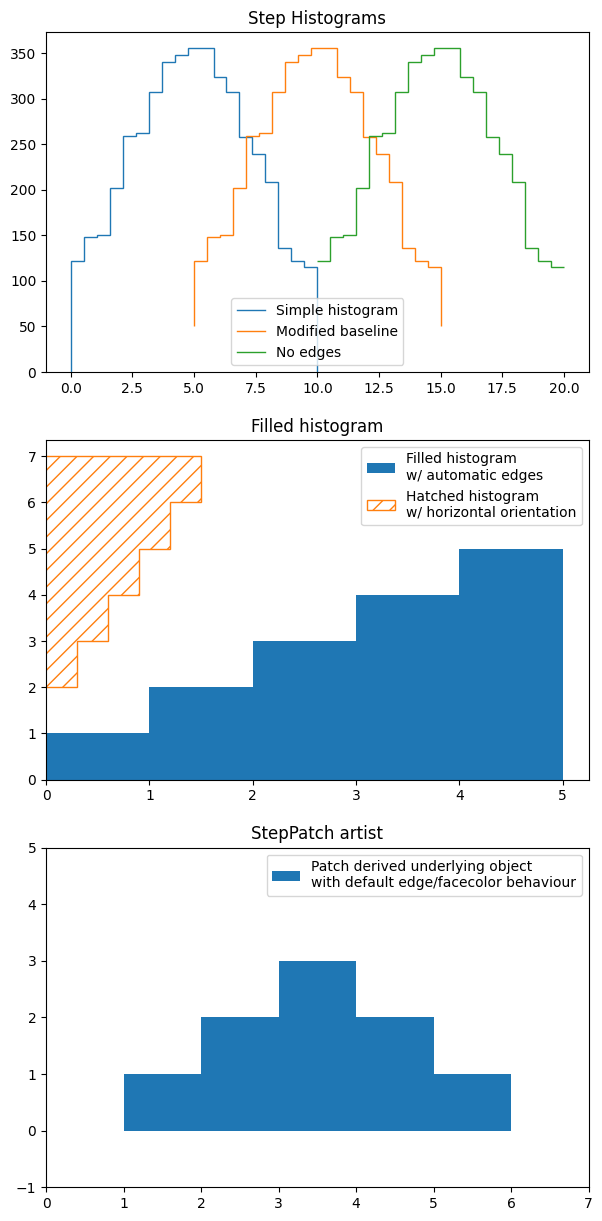

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

from matplotlib.patches import StepPatch

np.random.seed(0)
h, edges = np.histogram(np.random.normal(5, 3, 5000),
                        bins=np.linspace(0, 10, 20))

fig, axs = plt.subplots(3, 1, figsize=(7, 15))
axs[0].stairs(h, edges, label='Simple histogram')
axs[0].stairs(h, edges + 5, baseline=50, label='Modified baseline')
axs[0].stairs(h, edges + 10, baseline=None, label='No edges')
axs[0].set_title("Step Histograms")

axs[1].stairs(np.arange(1, 6, 1), fill=True,
              label='Filled histogram\nw/ automatic edges')
axs[1].stairs(np.arange(1, 6, 1)*0.3, np.arange(2, 8, 1),
              orientation='horizontal', hatch='//',
              label='Hatched histogram\nw/ horizontal orientation')
axs[1].set_title("Filled histogram")

patch = StepPatch(values=[1, 2, 3, 2, 1],
                  edges=range(1, 7),
                  label=('Patch derived underlying object\n'
                         'with default edge/facecolor behaviour'))
axs[2].add_patch(patch)
axs[2].set_xlim(0, 7)
axs[2].set_ylim(-1, 5)
axs[2].set_title("StepPatch artist")

for ax in axs:
    ax.legend()
plt.show()

In [ ]:
pn.extension()
number = pn.indicators.Number(
    name='Failure Rate', value=72, format='{value}%',
    colors=[(33, 'green'), (66, 'gold'), (100, 'red')]
)

pn.Row(number.clone(value=10), number.clone(value=42), number.clone(value=93))

Row
    [0] Number(colors=[(33, 'green'), ...], format='{value}%', name='Failure Rate', value=10)
    [1] Number(colors=[(33, 'green'), ...], format='{value}%', name='Failure Rate', value=42)
    [2] Number(colors=[(33, 'green'), ...], format='{value}%', name='Failure Rate', value=93)

In [ ]:
pn.extension()
large_df = pd._testing.makeCustomDataframe(100, 5)

paginated_table = pn.widgets.Tabulator(large_df, disabled=True, pagination='remote', page_size=10)
paginated_table

In [ ]:
pn.extension()
df = pd.DataFrame({
    'int': [1, 2, 3],
    'float': [3.14, 6.28, 9.42],
    'str': ['A', 'B', 'C'],
    'bool': [True, False, True],
    'date': [dt.date(2019, 1, 1), dt.date(2020, 1, 1), dt.date(2020, 1, 10)]
}, index=[1, 2, 3])

df_widget = pn.widgets.Tabulator(df, disabled =True, configuration={"headerSort": False, "resizableColumns": False})
df_widget.servable()

Tabulator(disabled=True, value=   int  float s...)

# **TEST** **HISTORY** & **STATISTIC**